This code calculates the trajectory of an object as it slingshots around a planet using conservation of energy. It also calculates the potential and kinetic energy over time.

This code does not work quite right yet! I think there are issues with how I rewrote it in Python from Matlab with the slicing and whatnot, but I think it'll be great once I fix that. There is some sort of problem with the velocity right now.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets # widgets
from IPython import display # control drawing of widgets
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 

In [45]:
# mec_spring_energy.m
# Ian Cooper
# School of Physics, University of Sydney
# http://www.physics.usyd.edu.au/teach_res/mp/mphome.htm

# In the section PLANET: comment / uncomment to select
#   stationary or moving planet


# Input and Constants +++++++++++++++++++++++++++++++++++++++++++++++
K = 80                # constant of proportionality
step = 250
t_max = 8             # max simulation time
nt = 100              # number of time steps

# ********************************************************************
#  Setup and initialize variables
# ********************************************************************
v_0x = 3;        # initial velcoity: x cpt.
v_0y = 0;        # initial velcoity: y cpt.
x0 = -10;                    # initial displacement: x cpt.
y0 = 3;                      # initial displacement: y cpt.

t = np.linspace(0, t_max, nt);                # time
dt = t[1] - t[0]                     # time step 

# PLANET --------------------------------------------------------------
# Select planet stationary or moving by commenting / uncommenting code
#vP =  0; xP0 = 2;   # Planet Stationary vP = 0
vP = -2; xP0 = 10       # Moving planet
# --------------------------------------------------------------------        
xP = xP0 + vP * t;
yP = np.zeros(nt)
Rd = np.zeros(nt)
vx = np.zeros(nt)
vy = np.zeros(nt)
ax = np.zeros(nt)
ay = np.zeros(nt)
v = np.zeros(nt)

x = np.zeros(nt)
y = np.zeros(nt)
xd = np.zeros(nt)

# ********************************************************************
#  Calculations
# ********************************************************************


x[0] = x0; y[0] = y0;
xd[0] = x[0] - xP[0];

Rd[0] = np.sqrt(xd[0]**2 + y[0]**2);
vx[0] = v_0x; vy[0] = v_0y;

ax[0] = -(K / abs(Rd[0])**3) * xd[0];
ay[0] = -(K / abs(Rd[0])**3) * y[0];

x[1] = x[0] + vx[0] * dt + 0.5 * ax[0] * dt**2;
y[1] = y[0] + vy[0] * dt + 0.5 * ay[0] * dt**2;

xd[1] = x[1] - xP[1];
Rd[1] = np.sqrt(xd[1]**2 + y[1]**2);

vx[1] = vx[0] + ax[0] * dt;
vy[1] = vy[0] + ay[0] * dt;

# time steps 3, 4, 5, ....
for c in range(2, nt):
    x[c] = -K*dt**2*xd[c-1]/Rd[c-1]**3 + 2*x[c-1] - x[c-2];
    y[c] = -K*dt**2*y[c-1]/Rd[c-1]**3 + 2*y[c-1] - y[c-2];
    xd[c] = x[c] - xP[c];
    Rd[c] = np.sqrt(xd[c]**2 + y[c]**2);


# velocity ----------------------------------------------------------
R = x + 1j * y;
temp_p = np.zeros(nt+2); temp_m = np.zeros(nt+2); temp = np.zeros(nt+2);
temp_p[:-2] = R
temp_m[2:] = R
temp = temp_p - temp_m

v[0] = np.abs((R[1]-R[0]) / dt)
v[-1] = np.abs((R[-1] - R[-2]) / dt);
v[:nt] = np.abs(temp[:-2] / (2*dt));

# energy
ET = -100*np.ones(nt)
EK = v**2
EP = ET- EK

C:\Users\mheig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\mheig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:80: ComplexWarning: Casting complex values to real discards the imaginary part


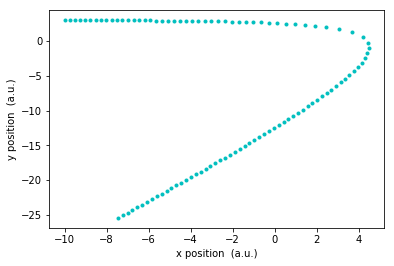

In [39]:
fig1 = plt.figure() # 111111111111111111111111111111111111111111111111111111111

# Plot: x, y trajectory
x_p = np.real(R);     # x data for plot
y_p = np.imag(R);     # y data for plot
ns = nt /50;
title_x = 'x position  (a.u.)';
title_y = 'y position  (a.u.)';

plt.plot(x_p, y_p, 'c.', label = "Satellite")
plt.xlabel(title_x);
plt.ylabel(title_y);
#plt.axis([-10, 10, -10, 10])

plt.show()

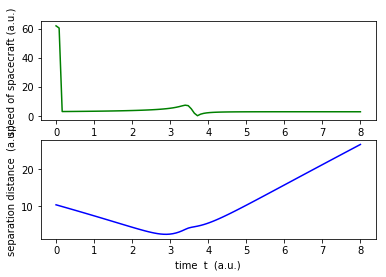

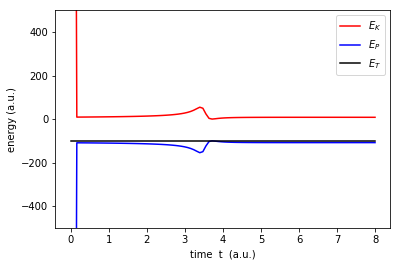

In [42]:
fig2 = plt.figure()# 22222222222222222222222222222222222222222222222222222222222
plt.subplot(2,1,1)
plt.plot(t, v, 'g-')
plt.xlabel('time  t  (a.u.)')
plt.ylabel('speed of spacecraft (a.u.)')

plt.subplot(2,1,2)
plt.plot(t, np.abs(R),'b-')
plt.xlabel('time  t  (a.u.)')
plt.ylabel('separation distance  (a.u.)')

fig3 = plt.figure(); # 44444444444444444444444444444444444444444444444444444444444
plt.plot(t, EK, 'r', label = '$E_K$')
plt.plot(t, EP, 'b', label = '$E_P$')
plt.plot(t, ET, 'k', label = '$E_T$')
plt.xlabel('time  t  (a.u.)')
plt.ylabel('energy (a.u.)')
plt.ylim(-500, 500)
plt.legend()

plt.show()